# Análise Exploratória dos Dados

## Entendimento de Negócio
Este é um dataset disponibilizado pelo Kaggle que contém informações de vendas e produtos de um restaurante. Os dados já se encontram pré-processados e limpos, todavia iremos certificar se ainda falta algo. Nosso objetivo com esse estudo é traçar perfís de clientes por segmentação, e caso fosse um projeto real, gerar insights para o time de negócios e o time de marketing visando uma maior rellação entre Empresa/Cliente.


#### Dicionário de dados

- order_id : um identificador exclusivo para cada pedido.
- date : data da transação.
- item_name : nome do alimento.
- item_type : categoria do item (Fastfood ou Bebidas).
- item_price : preço do item para 1 quantidade.
- quantity : quanta quantidade o cliente pede.
- transaction_amount : o valor total pago pelos clientes.
- transaction_type : método de pagamento (dinheiro, online, outros).
- received_by : gênero da pessoa que processa a transação.
- time_of_sale : diferentes horários do dia (manhã, noite, tarde, noite, meia-noite).

## Entendendo os dados

#### Importando bibliotecas

In [158]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [159]:
data =  pd.read_csv(os.getcwd()+'\\data\\raw\\restatorio_de_vendas_restaurante.csv')
data.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [160]:
# converte a coluna 'date' no formato MM DD YYYY
data_mdy = pd.to_datetime(data['date'], format='%m/%d/%Y', errors='coerce')

# converte a coluna 'date' no formato DD MM YYY
data_dmy = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')

In [161]:
for i in range(len(data['date'])):
    
    if i == '-':
        # converte a coluna 'date' no formato MM DD YYYY
        data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')
        
    elif i == '/':
        # converte a coluna 'date' no formato DD MM YYYY
        data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y', errors='coerce')


In [162]:
for i in range(len(data['date'])):
    
    if '-' in data['date'][i]:
        
        # separa MM DD YYYY
        dia, mes, ano = data['date'][i].split('-')
        
        # reorganiza da forma desejada (DD MM YYYY)
        data['date'][i] = f'{mes}/{dia}/{ano}'

In [163]:
# converte de object para datetime
data['date']= pd.to_datetime(data['date'])

In [164]:
data.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-03-07,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-03-02,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-02-10,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-03-05,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-10-06,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


- Observe que no nosso dataframe na coluna 'date', possuem formatos de datas diferentes. Para converte-las do jeito mais comum usando apenas o "pd.to_datetime" não seria possível pois retornaria um erro. A maneira que encontrei para contornar este problema foi a utilização do arumento "coerce", que faz com que o Pandas tente converter os dados no formato especificado, e os outros são definidos como "NaT", dessa forma consegui separar os dados em dois blocos e converte-los um por vez.

In [165]:
for col in data:
    print(f'Coluna {col.upper()}:')
    print(data[col].value_counts())
    print('Quantidade de registros:', sum(data[col].value_counts()))
    print(45 * '_')

Coluna ORDER_ID:
order_id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna DATE:
date
2022-11-10    8
2022-09-05    8
2022-08-31    8
2023-03-19    7
2023-03-02    7
             ..
2022-12-06    1
2022-04-15    1
2022-05-17    1
2022-07-23    1
2022-06-14    1
Name: count, Length: 348, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna ITEM_NAME:
item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna ITEM_TYPE:
item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64
Quantidade de registros: 1000
______________________________

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [167]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [168]:
data.describe()

,order_id,date,item_price,quantity,transaction_amount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-10-02 05:15:21.600000,33.315000,8.162000,275.230000
min,1.000000,2022-01-04 00:00:00,20.000000,1.000000,20.000000
25%,250.750000,2022-06-17 00:00:00,20.000000,4.000000,120.000000
50%,500.500000,2022-09-21 00:00:00,25.000000,8.000000,240.000000
75%,750.250000,2023-01-02 00:00:00,50.000000,12.000000,360.000000
max,1000.000000,2023-12-03 00:00:00,60.000000,15.000000,900.000000
std,288.819436,NaN,14.921744,4.413075,204.402979


In [169]:
data.duplicated().sum()

0

#### Observações:
- Na coluna 'transaction_type' apresenda alguns valores NaN, mas temos a informação de que esses valores ausente na verdade são categorizados como outros métodos de pagamento, logo iremos criar um rótulo a eles para preencher esses espaços.
- A quantidade de itens por pedido varia de 1 - 15 unidades.
- O gênero das pessoas estão rotulados como "Mr." e "Mrs."Iremos substituir por "M" para homens e "F" para mulheres, tornando mais simples a identificação.
- Os tipos de dados estão corretos.
- Nenhum valor duplicado.

In [170]:
# Substituindo valores da coluna 'received_by
data['received_by'] = data['received_by'].str.replace('Mr.', 'M').str.replace('Mrs.','F')

In [171]:
# Completando valores nulos na coluna 'transaction_type'
data['transaction_type'] = data['transaction_type'].fillna('Others')

#### Vizualizando a distribuição dos dados

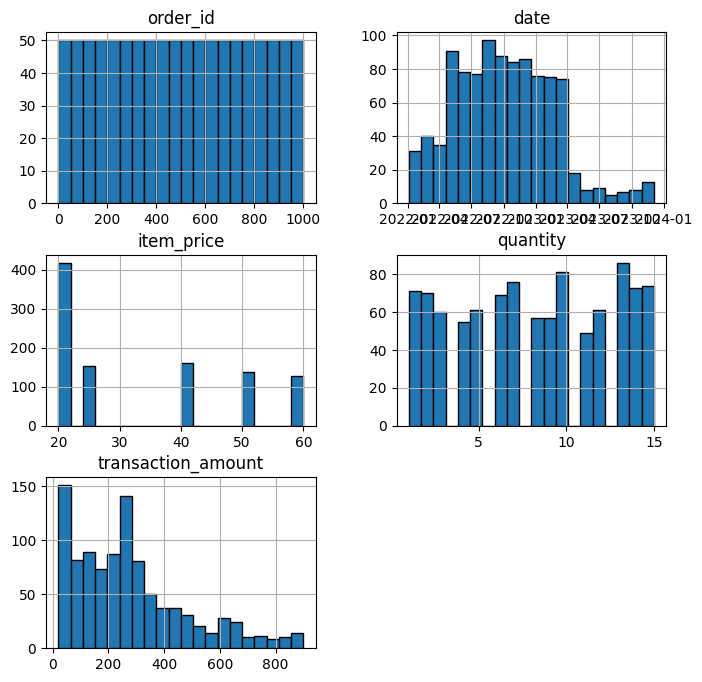

In [172]:
# Histograma
data.hist(figsize=(8,8), bins=20, edgecolor = 'black');

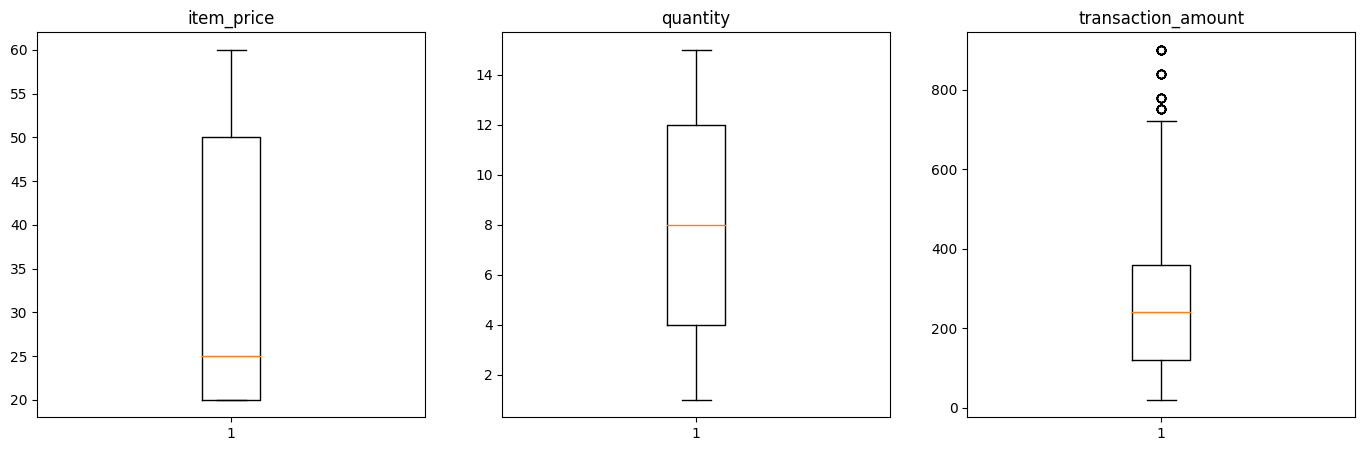

In [173]:
# Gráfico de Boxplot
columns = ['item_price', 'quantity', 'transaction_amount']

plt.figure(figsize=(17,5))
    
for i in range(len(columns)):
    plt.subplot(1,3,i+1)
    plt.title(columns[i])
        
    plt.boxplot(data[columns[i]])
        
plt.show()

<Figure size 800x800 with 0 Axes>

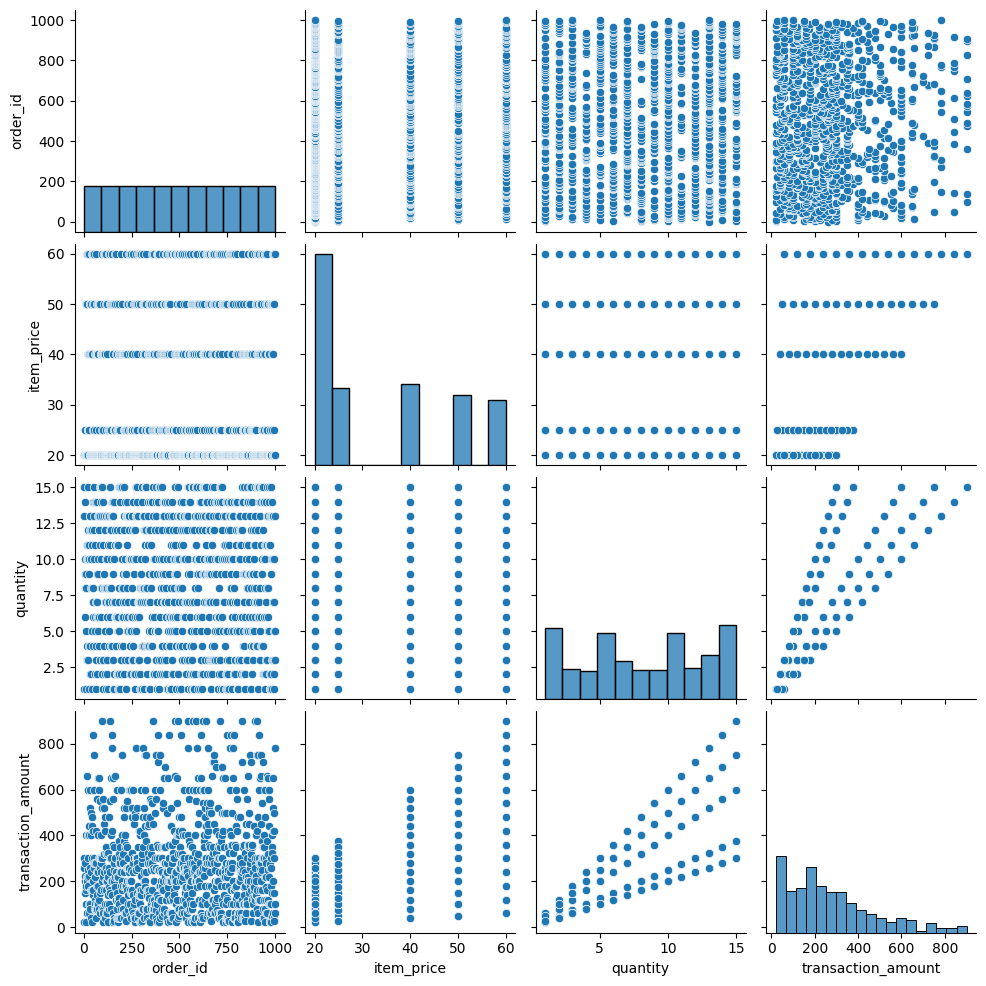

In [174]:
# Gráfico de Scatterplot
plt.figure(figsize=(8,8))

sns.pairplot(data)
plt.show()

#### Observações:
 - 'order_id' é uma variável contínua, logo é esperado que no histograma não apresente curvas.
 - 'item_price' apresenta uma maior quantidade de produtos vendidos com valores de 20 dólares, os demais valores tem uma pequena variação entre sí.
 - A média de valor gasto está em torno de 250 dólares.
 - Em 'transaction_ amount' conseguimos notar alguns outliers, logo mais teremos que lidar com esses valores pois iremos aplicar um modelo de clusterização para segmentar os clientes, e a clusterização é muito sensível à outliers pois como é um modelo baseado nas distâncias entre os dados, um valor extremo pode atrapalhar na identificação dos grupos corretos.
 - Como já é de se imaginar, há uma correlação entre a quantidade de itens vendidos e o valor gasto.

#### Qual produto mais vendido?

In [175]:
data['item_name'].value_counts()

item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64

- Cold Coffee é o produto mais vendido

#### Em média qual gênero gasta mais?

In [188]:
m = data.loc[data['received_by'] == 'M']
f = data.loc[data['received_by'] == 'F']

print(f'Em média os HOMENS gastam {round(m["transaction_amount"].mean())} dólares.')
print(f'Em média as MULHERES gastam {round(f["transaction_amount"].mean())} dólares.')

Em média os HOMENS gastam 280 dólares.
Em média as MULHERES gastam 270 dólares.


- Apesar de bem parecidos os resultados, os homens gastam um pouco a mais. Entretando creio que não seja algo tão determinístico.

#### Qual comida mais pedida por gênero?

In [196]:
data.groupby('received_by')['item_name'].value_counts()



received_by  item_name      
F            Cold coffee        79
             Frankie            76
             Sugarcane juice    74
             Panipuri           73
             Vadapav            66
             Aalopuri           60
             Sandwich           60
M            Cold coffee        82
             Sugarcane juice    79
             Panipuri           77
             Aalopuri           74
             Sandwich           69
             Vadapav            68
             Frankie            63
Name: count, dtype: int64

- Tanto paras as mulheres quanto os homens, o item mais pedido é o Cold Coffee (Café Frio).
- Para as mulheres o item menos pedido é o Sandwich (Sanduíche)
- Já para os homens, o item com menos pedidos é o Frankie

#### Qual turno o restaurante é mais frentado? E quanto é a média de gasta por clientes a cada turno?

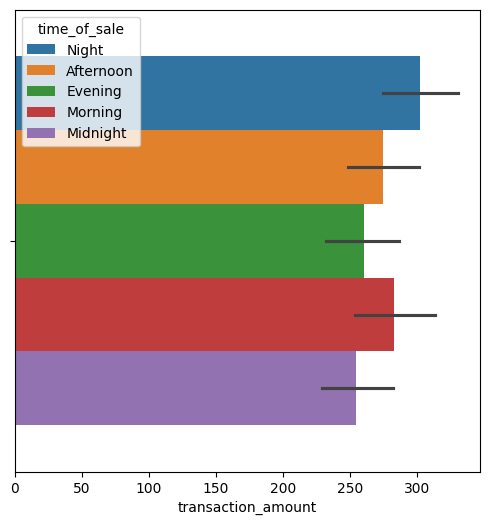

In [202]:
plt.figure(figsize=(6,6))
sns.barplot(data=data, x='transaction_amount', hue='time_of_sale')
plt.show()

____

# Pré-Processamento de Dados

## Feature Engine
Nossos dados apresentam algumas colunas nominais, para o processo de machine learning é muito importante que os dados estejam representados de forma numérica ou categórica. Nesta etapa faremos a transformação desses dados para posteriormente aplicarmos nossos modelos de clusterização.

#### Quem são os outliers de 'transaction_amount'?
Para descobrir as extremidades dos dados, usaremos o calculo interquartílico que nos informará as margens. Poderemos analisar quem são esses outliers e tomar uma decisão de o que fazer com eles com uma maior precisão.

In [ ]:
# Cálculo Interquartílico na coluna 'transaction_amount'
q1 = data['transaction_amount'].quantile(0.25)
q3 = data['transaction_amount'].quantile(0.75)

# Intervalo Interquatpilico
iqr = q3-q1

# limite inferior
inf = q1 - 1.5 * iqr

# limite superior
sup = q3 + 1.5 * iqr

print(f'Limite Superior: {sup}')
print(f'Limite Inferior: {inf}')

Limite Superior: 720.0
Limite Inferior: -240.0


In [ ]:
outlier_transaction = data.loc[data['transaction_amount'] > 720]

print(len(outlier_transaction), 'registros')

outlier_transaction

44 registros


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
47,48,2023-02-23,Sandwich,Fastfood,60,14,840,Online,M,Afternoon
50,51,2022-05-16,Frankie,Fastfood,50,15,750,Online,F,Morning
95,96,2022-08-22,Sandwich,Fastfood,60,15,900,Others,M,Morning
137,138,NaT,Sandwich,Fastfood,60,15,900,Online,M,Night
144,145,NaT,Sandwich,Fastfood,60,14,840,Online,M,Morning
147,148,2023-03-19,Sandwich,Fastfood,60,13,780,Online,M,Evening
197,198,NaT,Frankie,Fastfood,50,15,750,Cash,M,Morning
269,270,NaT,Sandwich,Fastfood,60,13,780,Cash,M,Evening
307,308,2022-12-17,Sandwich,Fastfood,60,13,780,Online,M,Evening
318,319,2022-06-30,Frankie,Fastfood,50,15,750,Cash,M,Afternoon


#### Observações sobre os outliers:
- Apresentam 44 registros de outliers, o que é cerca de 4,5% dos dados. Neste projeto vou optar pela remoção desses dados já que nosso objetivo principal é treinar modelos de clusterização que por sua vez são muito sensíveis ao distânciamento entre os dados. Em uma caso real, possivelmente seria converssado como time de negócios da empresa e chegar a uma conclusão de qual destino levaria esses outliers.

In [ ]:
# criando variável de dados pré-processados e removendo outliers
data_proc = data.loc[data['transaction_amount'] <=720, :]
data_proc

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,NaT,Aalopuri,Fastfood,20,13,260,Others,M,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,M,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,M,Afternoon
3,4,NaT,Sugarcane juice,Beverages,25,6,150,Online,M,Night
4,5,NaT,Sugarcane juice,Beverages,25,8,200,Online,M,Evening
...,...,...,...,...,...,...,...,...,...,...
994,995,2022-06-18,Sugarcane juice,Beverages,25,1,25,Online,M,Night
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Others,F,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Others,M,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Others,F,Afternoon
